<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/07_Matplotlib_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(a)** Write a Python program to draw a scatter plot using random distributions to generate drops of different sizes and colors

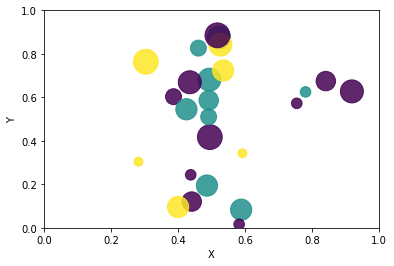

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# create random data
no_of_balls = 25
x = [np.random.triangular(0.1,0.5,1) for i in range(no_of_balls)]
y = [np.random.random(1) for i in range(no_of_balls)]
colors = [np.random.randint(1, 4) for i in range(no_of_balls)]
areas = [np.pi * np.random.randint(5, 15)**2 for i in range(no_of_balls)]
# draw the plot
plt.figure()
plt.scatter(x, y, s=areas, c=colors, alpha=0.85)
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**(b)** creat a random grayscale image (5,5) and apply apply the following interpolations with imshow()

[None, 'none', 'nearest', 'bilinear','bicubic', 'spline16',           'spline36', 'hanning', 'hamming','hermite', 'kaiser', 'quadric',           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

show results side-by-side
hint: use `subplot_kw={'xticks': [], 'yticks': []}` when defining the fig and axs to remove x,y ticks

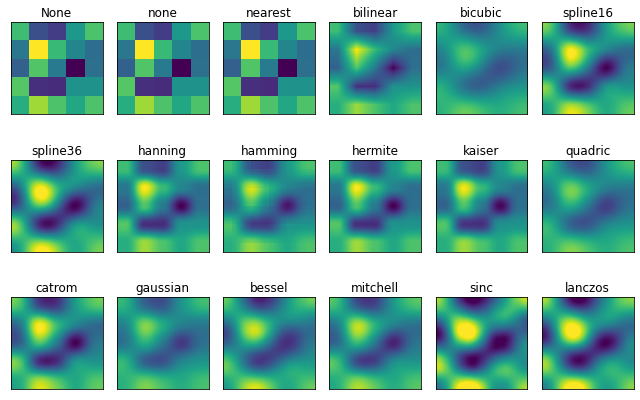

In [ ]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(123)

grid = np.random.rand(5, 5)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

**(c)** Make two 50 sec signals with 10ms time resolution and consist of a coherent part (cos(pi * 2 * freq *x) at 5Hz  and a random part (white noise). Plot coherence and cross-correlation of two signals with ax.cohere() and ax.xcorr(). Add autocorrelations with ax.acorr() and maxlags=50 

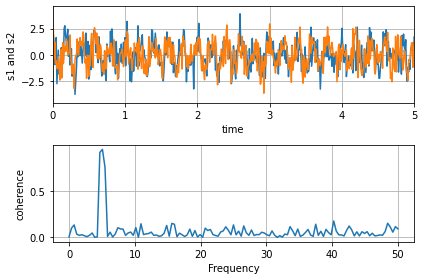

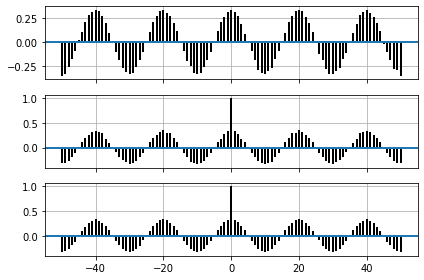

In [ ]:
np.random.seed(123)

dt = 0.01
t = np.arange(0, 50, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.cos(np.pi* 10 * t) + nse1
s2 = np.cos(np.pi *10* t) + nse2


fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 5)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].xcorr(s1, s2, usevlines=True, maxlags=50, normed=True, lw=2)
axs[0].grid(True)

axs[1].acorr(s1, usevlines=True, normed=True, maxlags=50, lw=2)
axs[1].grid(True)

axs[2].acorr(s2, usevlines=True, normed=True, maxlags=50, lw=2)
axs[2].grid(True)

fig.tight_layout()
plt.show()

